# Introduction

- In this notebook, we are going to learn to deal with marketing dataset. our goal is to extract insight through data exploration focusing on marketing metrics.

- We are going to use `bank-additional-full-alt.csv` for this module.

- The dataset can be obtained from this website:
  https://archive.ics.uci.edu/dataset/222/bank+marketing

# Import Libraries

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

These variables are going to be the main focus to calculate customer engagement:
  
  1. `contact`:
    - Represents the contact communication type, such as cellular, telephone, or unknown. It captures the method of contact made by the bank to engage with customers.
  
  2. `month`:
    - Indicates the month of the last contact with the customer. It provides information on the timing of the engagement.
  
  3. `day_of_week`:
    - Represents the day of the week of the last contact. It offers insights into the specific days when customers were engaged.

# Import Data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/binggas/public-dataset/main/bank%2Bmarketing/bank-additional/bank-additional-full-alt.csv")
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Part 01: Data Cleaning & Pre-processing

## Check for Duplicates

In [4]:
# find duplicates
dup = df[df.duplicated()]

print('Duplicate Rows: ')
dup

Duplicate Rows: 


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [3]:
# Find duplicates based on columns combination: "age", "job" ,"marital", "education", "housing", "loan"
df.duplicated(['age', 'job', 'marital', 'education', 'housing', 'loan']).sum()

30719

In [4]:
# take a peek on the duplicate cases
sub_dup = df[df.duplicated(['age', 'job', 'marital', 'education', 'housing', 'loan'])]
sub_dup

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
11,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
16,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
31,59,technician,married,unknown,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
86,41,management,married,basic.6y,no,no,no,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
# Take one value combination and take a peek at the data
df[(df["age"] == 35) & 
   (df['marital'] == 'married') &
   (df['job'] == 'technician') &
   (df['education'] == 'unknown') &
   (df['housing'] == 'no') &
   (df['loan'] == 'no')
   ]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
3384,35,technician,married,unknown,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.86,5191.0,yes


- There seems to be no duplicates that would harm our analyses. For now, we can move on to the next step.

## Check Unique Values

In [7]:
# Check unique values of `contact` column
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [8]:
# value counts
df['contact'].value_counts()

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

In [9]:
# Check unique values of `month` column
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [10]:
# value counts
df['month'].value_counts()

month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64

In [11]:
# Check unique values of `day_of_week` column
df['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [12]:
# value counts
df['day_of_week'].value_counts()

day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64

In [13]:
# Check for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

## Checking for Outliers


- I need to check if we need to exclude outliers based on age



In [14]:
# Get quick statistict of the column `age`
df['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [15]:
# Get the average value
print("average : ", np.mean(df["age"]))

# Get the 5th, 50th, and 95th percentile value
print("5th percentile : ", np.percentile(df["age"], 5))
print("95th percentile : ", np.percentile(df["age"], 95))

average :  40.02406040594348
5th percentile :  26.0
95th percentile :  58.0


[]

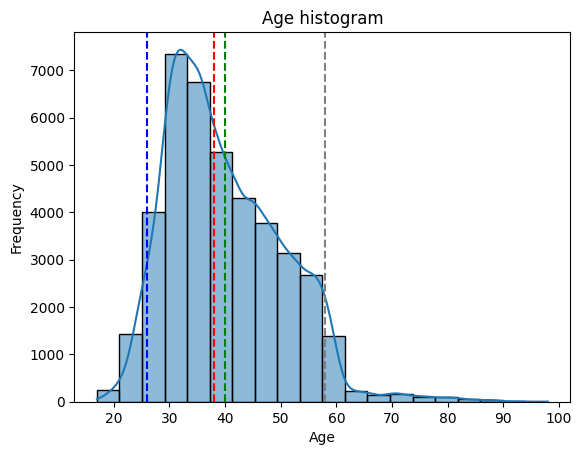

In [16]:
# Create histogram for the `age` column

fig, ax =  plt.subplots()
sns.histplot(df['age'], 
            bins=20, 
            kde=True, 
            ax=ax
            )

# Put a line for average value
ax.axvline(x=np.mean(df["age"]), c="green", linestyle="--", label='avg_age')

# Put a line for 5th, 50th, and 95th percentile value
ax.axvline(x=np.percentile(df['age'], 5), c='blue', linestyle='--', label='5th percentile')
ax.axvline(x=np.percentile(df['age'], 50), c='red', linestyle='--', label='50th percentile')
ax.axvline(x=np.percentile(df['age'], 95), c='grey', linestyle='--', label='95th percentile')

# Add labels, legend, title
plt.title('Age histogram')
plt.ylabel('Frequency')
plt.xlabel('Age')

# Show the plot
plt.plot()

[]

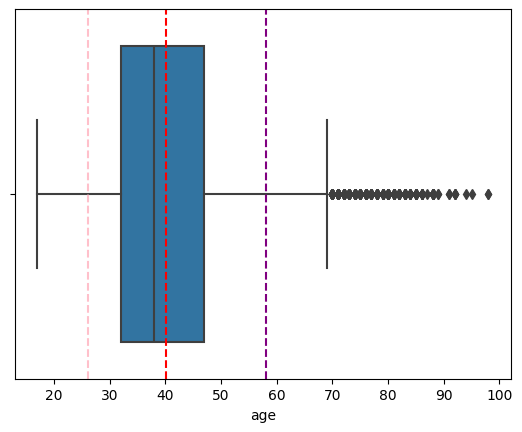

In [17]:
# Create boxplot for the `age` column
fig, ax =  plt.subplots()
sns.boxplot(df,
            x='age'
            )

# Put a line for average value
ax.axvline(x=np.mean(df['age']), c='red', linestyle='--')

# Put a line for 5th, and 95th percentile value
ax.axvline(x=np.percentile(df['age'], 5), c='pink', linestyle='--')
ax.axvline(x=np.percentile(df['age'], 95), c='purple', linestyle='--')
# Show the plot
plt.plot()

- It does not seem like there is any proof that the outlier will interfere with our analysis since:
  1. The outlier is not skewing the data dsitribution too much. This can be seen by comparing the median and average value. For a more exact confirmation for this, I'll check the skewness value.
  2. There are a lot of outliers, but the majority of the data can still be considered to be distributed normally. I might lose important information if I decide to filter out the outliers.

In [18]:
# 'age', 'job', 'marital', 'education', 'housing', 'loan'
# pd.unique(df[['job', 'marital', 'education', 'housing', 'loan']].values.ravel('K'))

df['housing_change'] = np.where(df['housing'] == 'no', 0, 
                                (np.where(df['housing'] == 'yes', 1, 2)))

df['loan_change'] = np.where(df['loan'] == 'no', 0, 
                            (np.where(df['loan'] == 'yes', 1, 2)))

df['job_change'] = np.where(df['job'] == 'admin.', 0, (np.where(df['job'] == 'blue-collar', 1, (np.where(df['job'] == 'technician', 2, np.where(df['job'] == 'services', 3,
                    (np.where(df['job'] == 'management', 4, (np.where(df['job'] == 'retired', 5, (np.where(df['job'] == 'entrepreneur', 6, (np.where(df['job'] == 'self-employed', 7,
                        (np.where(df['job'] == 'housemaid', 8, (np.where(df['job'] == 'unemployed', 9, (np.where(df['job'] == 'student', 10, 11))))))))))))))))))))

df['marital_change'] = np.where(df['marital'] == 'married', 0, 
                                (np.where(df['marital'] == 'single', 1, 
                                        (np.where(df['marital'] == 'divorced', 2, 3)))))

df['edu_change'] = np.where(df['education'] == 'university.degree', 0, (np.where(df['education'] == 'high.school', 1, (np.where(df['education'] == 'basic.9y', 2, 
                    np.where(df['education'] == 'professional.course', 3, (np.where(df['education'] == 'basic.4y', 4, (np.where(df['education'] == 'basic.6y', 5, 
                        (np.where(df['education'] == 'unknown', 6, 7))))))))))))


In [19]:
# Add customer ID
df["customer_id"] = df["age"].astype(str) + df['job_change'].astype(str) + df['marital_change'].astype(str) + \
                        df['edu_change'].astype(str) + df['housing_change'].astype(str) + df['loan_change'].astype(str)

# Show first 5 rows
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons_conf_idx,euribor3m,nr_employed,y,housing_change,loan_change,job_change,marital_change,edu_change,customer_id
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,0,0,8,0,4,5680400
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,0,0,3,0,1,5730100
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,1,0,3,0,1,3730110
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,0,0,0,0,5,4000500
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,-36.4,4.857,5191.0,no,0,1,3,0,1,5630101


In [24]:
df[df['customer_id'] == '5680400']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons_conf_idx,euribor3m,nr_employed,y,housing_change,loan_change,job_change,marital_change,edu_change,customer_id
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,0,0,8,0,4,5680400
3999,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,-36.4,4.858,5191.0,no,0,0,8,0,4,5680400
8629,56,housemaid,married,basic.4y,no,no,no,telephone,jun,wed,...,-41.8,4.864,5228.1,no,0,0,8,0,4,5680400
14559,56,housemaid,married,basic.4y,unknown,no,no,cellular,jul,tue,...,-42.7,4.961,5228.1,no,0,0,8,0,4,5680400
19801,56,housemaid,married,basic.4y,unknown,no,no,cellular,aug,fri,...,-36.1,4.966,5228.1,no,0,0,8,0,4,5680400
33981,56,housemaid,married,basic.4y,unknown,no,no,cellular,may,wed,...,-46.2,1.281,5099.1,no,0,0,8,0,4,5680400


In [21]:
# shift column 'Name' to first position 
first_column = df.pop('customer_id') 

# insert column using insert(position,column_name, 
# first_column) function 
df.insert(0, 'customer_id', first_column)

In [22]:
df

,customer_id,age,job,marital,education,default,housing,loan,contact,month,...,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,housing_change,loan_change,job_change,marital_change,edu_change
0,5680400,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,93.994,-36.4,4.857,5191.0,no,0,0,8,0,4
1,5730100,57,services,married,high.school,unknown,no,no,telephone,may,...,93.994,-36.4,4.857,5191.0,no,0,0,3,0,1
2,3730110,37,services,married,high.school,no,yes,no,telephone,may,...,93.994,-36.4,4.857,5191.0,no,1,0,3,0,1
3,4000500,40,admin.,married,basic.6y,no,no,no,telephone,may,...,93.994,-36.4,4.857,5191.0,no,0,0,0,0,5
4,5630101,56,services,married,high.school,no,no,yes,telephone,may,...,93.994,-36.4,4.857,5191.0,no,0,1,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,7350310,73,retired,married,professional.course,no,yes,no,cellular,nov,...,94.767,-50.8,1.028,4963.6,yes,1,0,5,0,3
41184,4610300,46,blue-collar,married,professional.course,no,no,no,cellular,nov,...,94.767,-50.8,1.028,4963.6,no,0,0,1,0,3
41185,5650010,56,retired,married,university.degree,no,yes,no,cellular,nov,...,94.767,-50.8,1.028,4963.6,no,1,0,5,0,0
41186,4420300,44,technician,married,professional.course,no,no,no,cellular,nov,...,94.767,-50.8,1.028,4963.6,yes,0,0,2,0,3


In [23]:
# check number of unique of customer_id column
df['customer_id'].nunique()

10469

# Part 02: Calculate Engagement Metrics

Relevant variables for analysis
1. `contact`: The contact communication type (e.g., cellular, telephone).
2. `month`: The month of the last contact with the customer.
3. `day_of_week`: The day of the week of the last contact.
4. `duration`: The duration of the last contact in seconds.
5. `campaign`: The number of contacts performed as part of a specific marketing campaign for the customer.
6. `previous`: The number of contacts made with the customer before the current campaign.
7. `poutcome`: The outcome of the previous marketing campaign (e.g., success, failure, unknown).
8. `education`: The customer's education level.
9. `job`: The customer's occupation or job category.
10. `age`: The customer's age.
11. `marital`: The customer's marital status.
12. `housing`: The type of housing the customer has (e.g., own, rent, unknown).

## Contact Frequency

In [24]:
# group by `customer_id` and `contact`
channel_usage_freq = df.groupby(['customer_id', 'contact']).size()

# rename column to be called `count`
channel_usage_freq = pd.DataFrame(channel_usage_freq).rename(columns={0:'count'})

# sort values descending by the `count` column
channel_usage_freq.sort_values(by = 'count', ascending=False, inplace=True)

# show the top 5 data
channel_usage_freq.head()

,,count
customer_id,contact,
2901010,cellular,92
3101010,cellular,84
3201010,cellular,73
3001000,cellular,73
3001010,cellular,72


- Show the `count` column distribution.

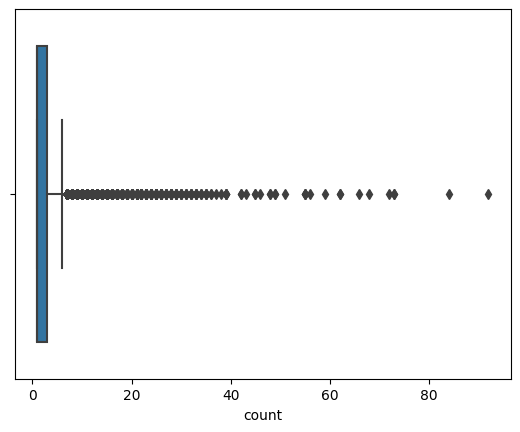

In [25]:
# show usage_freq in boxplot
sns.boxplot(channel_usage_freq,
            x='count'
            )
plt.show()

In [26]:
# group by `customer_id`
contact_frequency = df.groupby('customer_id').size()

# rename column to be called `count`
contact_frequency = pd.DataFrame(contact_frequency).rename(columns={0:'count'})

# sort values descending by the `count` column
contact_frequency.sort_values(by = 'count', ascending=False, )

,count
customer_id,
2901010,114
3101010,101
3201010,92
3201000,89
2901000,88
...,...
3391210,1
4721200,1
4721100,1


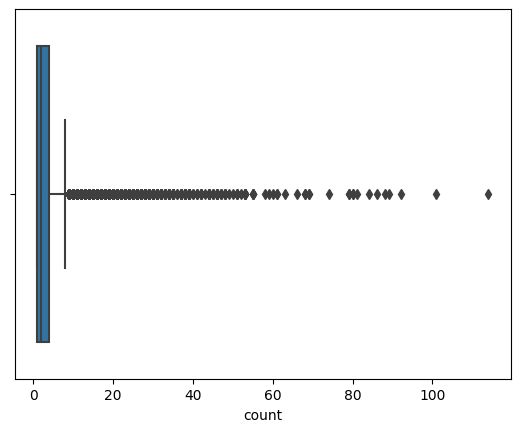

In [27]:
sns.boxplot(contact_frequency,
            x='count'
            )
plt.show()

## Duration of Contact


In [28]:
# group by `customer_id`
duration_of_contact = df.groupby('customer_id').agg({'duration':['sum', 'mean']})


# show the top 5 data
duration_of_contact.head()

duration            
                 sum        mean
customer_id                     
17101210         274  137.000000
17101222         498  498.000000
17101601         896  896.000000
17101610         432  432.000000
18101100         602  200.666667

In [29]:
duration_of_contact.describe()

duration              
                sum          mean
count  10469.000000  10469.000000
mean    1016.166109    259.822163
std     1868.915536    208.220261
min        0.000000      0.000000
25%      175.000000    135.250000
50%      409.000000    214.700000
75%     1001.000000    315.333333
max    26895.000000   3284.000000

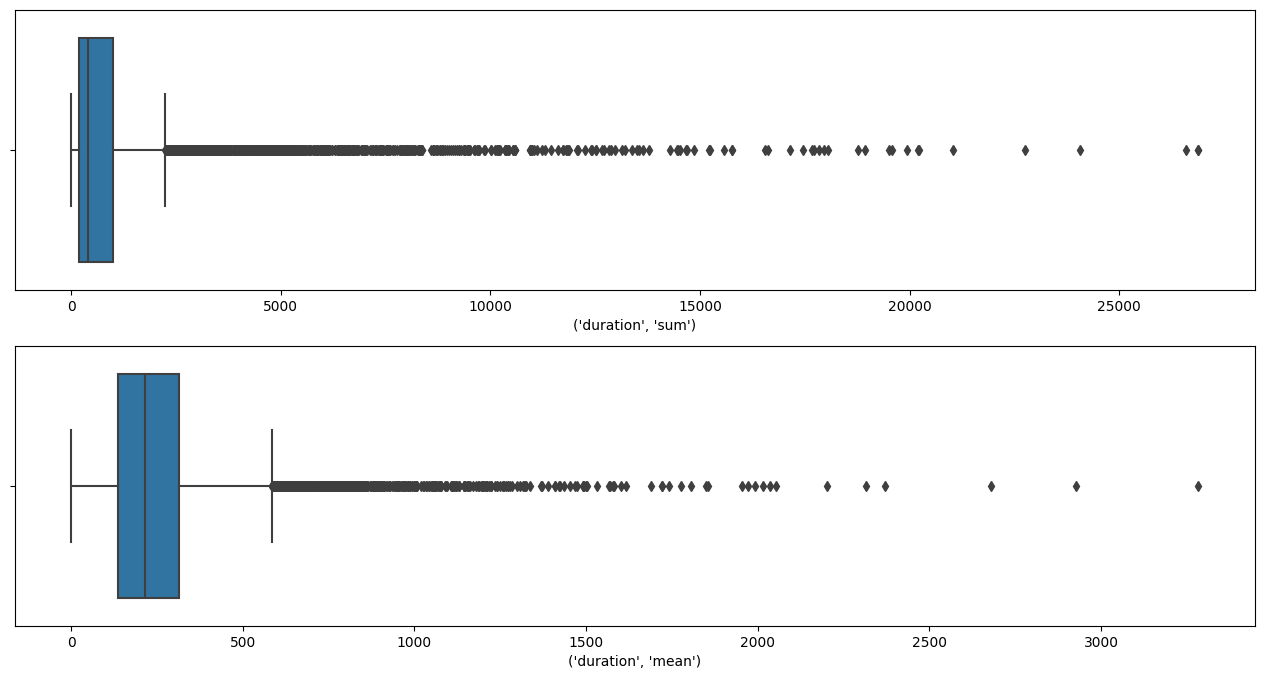

In [30]:
# Create 2 boxplot using subplots
fig, ax = plt.subplots(figsize=(16,8), nrows=2)

# create 1st plot
sns.boxplot(data = duration_of_contact,
            x = ("duration","sum"), 
            ax=ax[0]
            )

# create 2nd plot
sns.boxplot(data = duration_of_contact,
            x = ("duration","mean"), 
            ax=ax[1]
            )


# Show the plot
plt.show()

From the data above, it can be seen that the average duration of contact made by each consumer is 4 minutes, the longest being almost 1 hour.

## Most Frequent Contact

In [31]:
# reset index if needed
channel_usage_freq.reset_index(inplace=True)

# create a column called `rank` using dense rank
channel_usage_freq['rank'] = channel_usage_freq.groupby(["customer_id"])["count"].rank(method='dense', ascending=False).astype(int)
channel_usage_freq

,customer_id,contact,count,rank
0,2901010,cellular,92,1
1,3101010,cellular,84,1
2,3201010,cellular,73,1
3,3001000,cellular,73,1
4,3001010,cellular,72,1
...,...,...,...,...
14005,3290310,telephone,1,1
14006,3291010,telephone,1,2
14007,4520100,telephone,1,1
14008,4520100,cellular,1,1


In [32]:
# Check for one `customer_id`
channel_usage_freq[channel_usage_freq["customer_id"] == '3001000']

,customer_id,contact,count,rank
3,3001000,cellular,73,1
513,3001000,telephone,13,2


In [33]:
# Get only rank = 1 in dataframe channel_usage_freq
channel_usage_freq_ranked = channel_usage_freq[channel_usage_freq['rank'] == 1].copy() # use .copy() to make sure that I can reuse the channel_usage_freq Dataframe later in the analysis

# Show first 5 rows
channel_usage_freq_ranked.head()

,customer_id,contact,count,rank
0,2901010,cellular,92,1
1,3101010,cellular,84,1
2,3201010,cellular,73,1
3,3001000,cellular,73,1
4,3001010,cellular,72,1


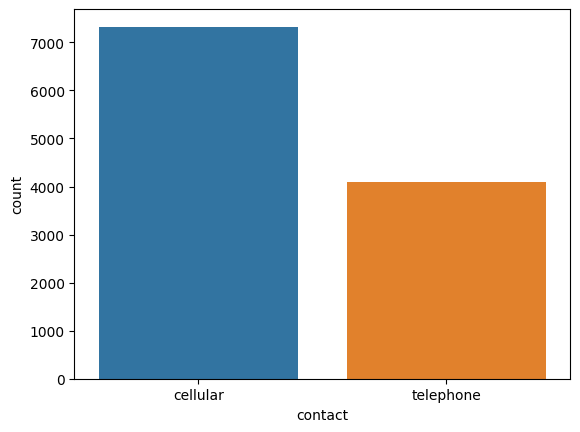

In [34]:
# show frquency of each value in the `contact` column
sns.countplot(x = 'contact',
            data = channel_usage_freq_ranked
            )

# show the graph
plt.show()

## Campaign Conversion Rate

- Rate at which customers respond yes to marketing campaigns.

In [35]:
# find unique customer_id per campaign
campaign_unique_cust = df.groupby('campaign').agg({'customer_id':'nunique'})


# properly rename the result column to be `unique_cust_cnt`
campaign_unique_cust = campaign_unique_cust.rename(columns={'customer_id':'unique_cust_cnt'})


# Check first 5 data
campaign_unique_cust.head()

,unique_cust_cnt
campaign,
1,6565
2,4973
3,3153
4,1928
5,1252


In [36]:
# find unique customer_id per campaign and y
campaign_respond_unique_cust = df.groupby(['campaign', 'y']).agg({'customer_id':'nunique'})

# properly rename the result column to be `unique_respond_cust_cnt`
campaign_respond_unique_cust = campaign_respond_unique_cust.rename(columns={'customer_id':'unique_respond_cust_cnt'})

# Check first 5 data
campaign_respond_unique_cust.head() 

unique_respond_cust_cnt
campaign y                           
1        no                      6002
         yes                     1645
2        no                      4580
         yes                      994
3        no                      2915

In [37]:
# Merge campaign_respond_unique_cust and campaign_unique_cust by the index
campaign_conv_rate = campaign_respond_unique_cust.merge(campaign_unique_cust, left_index=True, right_index=True)

# Check first 5 data
campaign_conv_rate.head()

unique_respond_cust_cnt  unique_cust_cnt
campaign y                                            
1        no                      6002             6565
         yes                     1645             6565
2        no                      4580             4973
         yes                      994             4973
3        no                      2915             3153

In [38]:
# Create new DataFrame to keep the old DataFrame save. But only get the rows where `y = yes`
campaign_conv_rate_responded = campaign_conv_rate.loc[slice(None), 'yes', :].copy()


# rename the columns
campaign_conv_rate_responded.rename(columns={'unique_respond_cust_cnt':'responded_customer', 
                                            'unique_cust_cnt': 'total_customer'}, 
                                            inplace=True)

# get conversion rate
campaign_conv_rate_responded["campaign_conversion_rate"] = campaign_conv_rate_responded['responded_customer'] / campaign_conv_rate_responded['total_customer']

# show result
campaign_conv_rate_responded.head()

,responded_customer,total_customer,campaign_conversion_rate
campaign,,,
1,1645,6565,0.250571
2,994,4973,0.199879
3,511,3153,0.162068
4,241,1928,0.125000
5,117,1252,0.093450


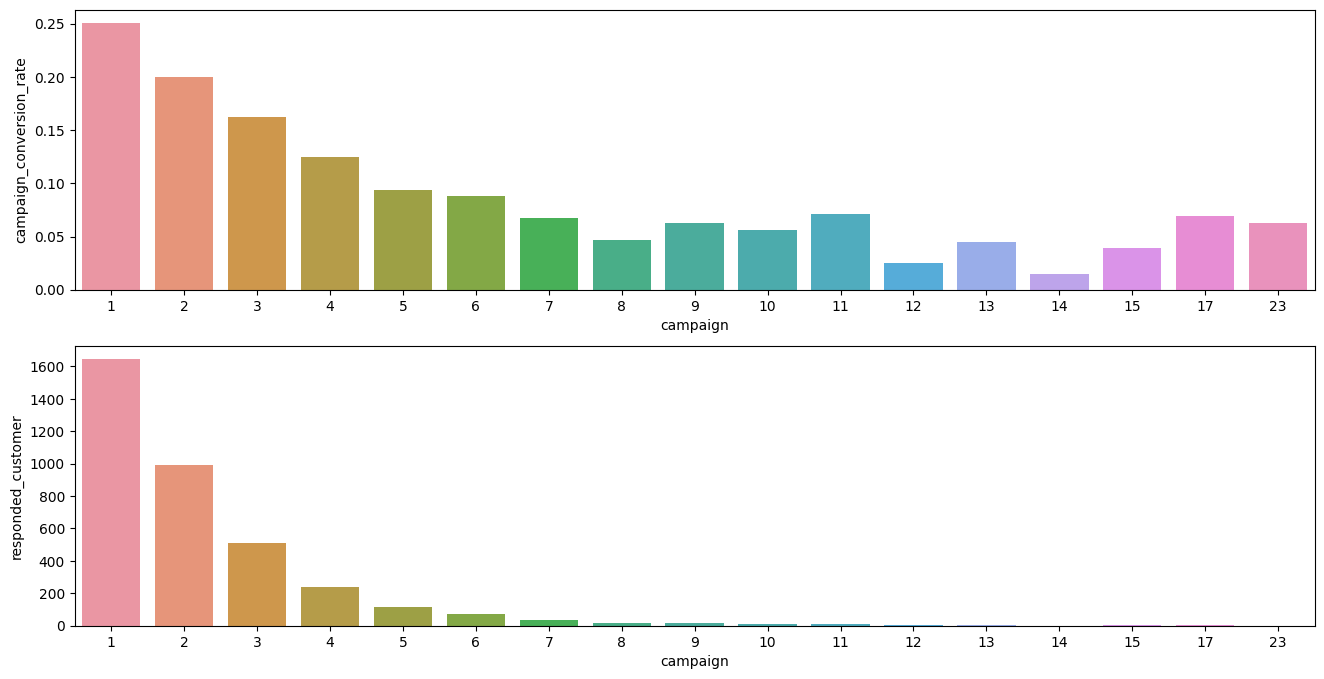

In [39]:
fig, ax = plt.subplots(figsize=(16,8), nrows=2)

sns.barplot(data = campaign_conv_rate_responded.reset_index(),
            x = "campaign",
            y = "campaign_conversion_rate",
            ax = ax[0]
            )

sns.barplot(data = campaign_conv_rate_responded.reset_index(),
            x = "campaign",
            y = "responded_customer",
            ax = ax[1]
            )


plt.show()

- From the first graph, it can be seen that the first campaign carried out gets a high conversion rate, the more or repeated the campaign, the lower the conversion rate.
- The conversion rate is in line with the response from consumers which is getting smaller and smaller over time.

## Campaign Engagement

In [40]:
# find number of row per customer_id per campaign and y
campaign_engagement = pd.DataFrame(df.groupby(['customer_id', 'campaign']).size())

# properly rename the result column to be `count`
campaign_engagement.rename(columns={0:'count'}, inplace=True)

# reset index
campaign_engagement.reset_index(inplace=True)

# sort values by `count`
campaign_engagement.sort_values(by='count')

,customer_id,campaign,count
0,17101210,2,1
13039,4460301,14,1
13040,4460310,3,1
13042,4460410,2,1
13044,4460422,2,1
...,...,...,...
5830,3400000,1,40
2936,3001010,1,43
2924,3001000,1,44
3656,3101010,1,49


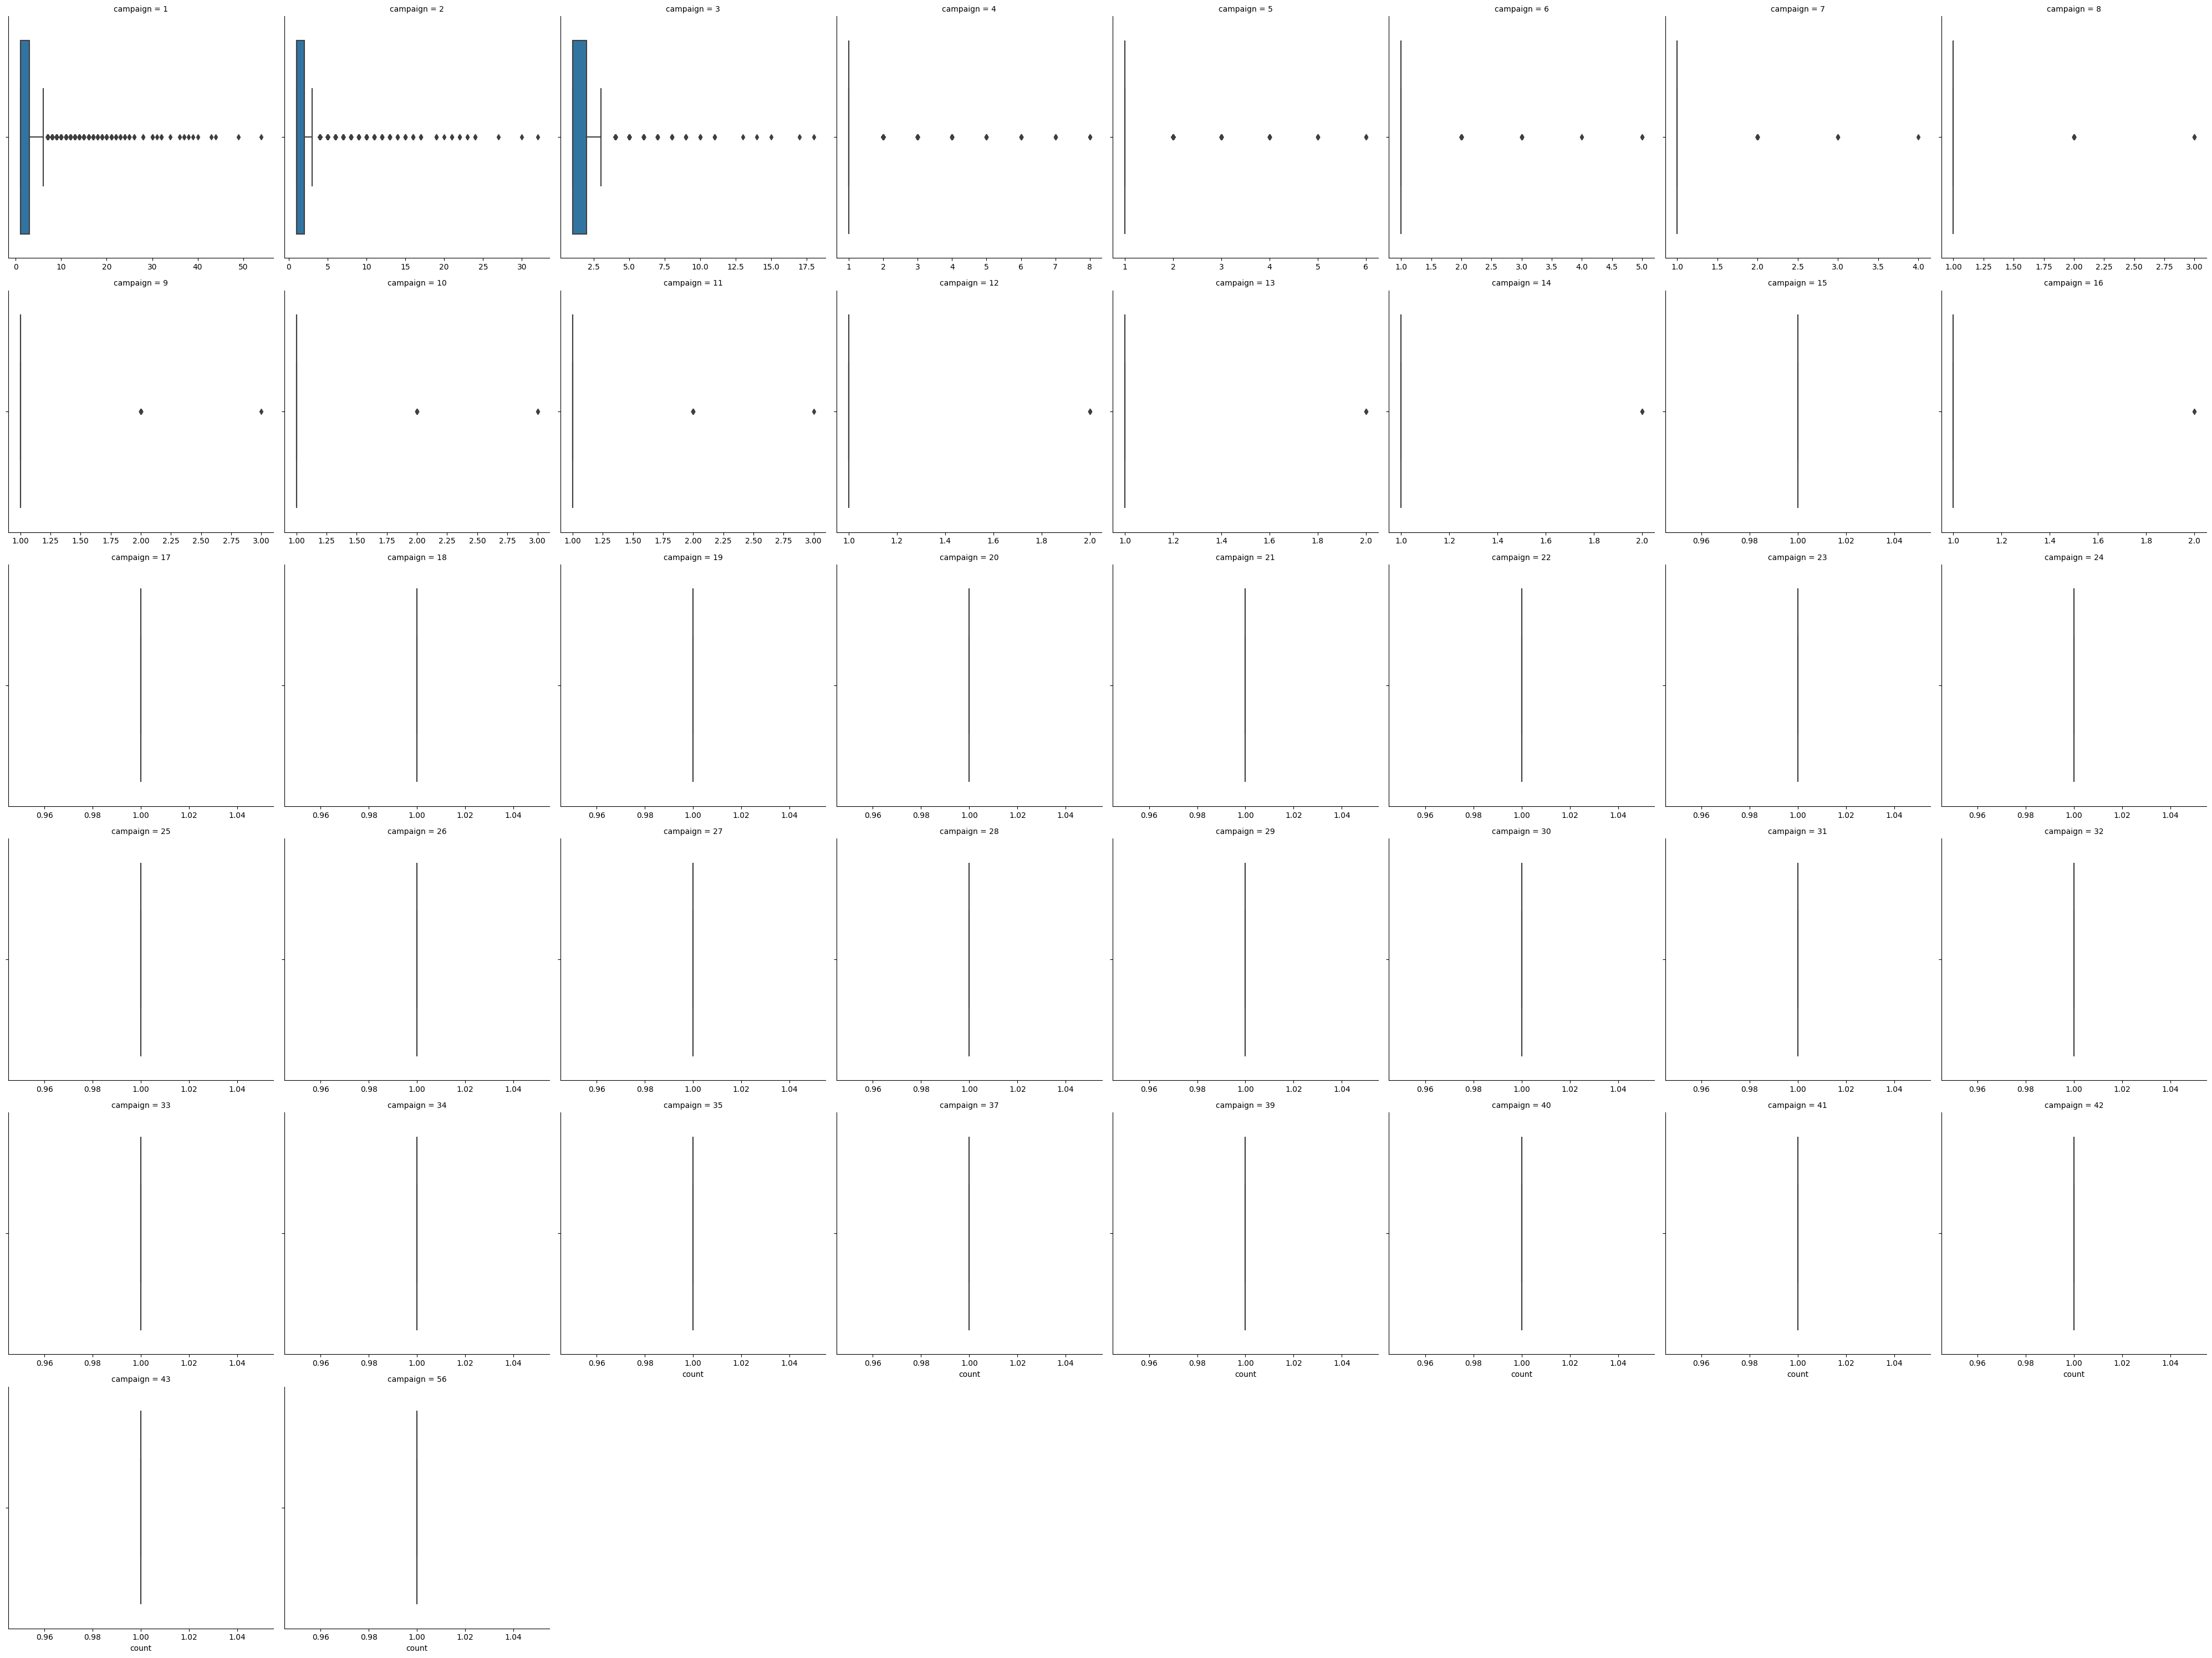

In [41]:
sns.catplot(data = campaign_engagement,
            x= "count",
            kind= "box",
            col= "campaign", # drawing each campaign into 1 plot
            col_wrap = 8, # creating 4 columns
            sharex = False   #to make each graph not to share x axis scale
            # showfliers = False  # This parameter controls if we want to show outliers or not
            )

plt.show()

The most effective campaigns are in campaigns 1 to 3

# Segmentation

In [42]:
# Find the number of row by customer_id and campaign.
campaign_count = pd.DataFrame(df.groupby(['customer_id', 'campaign']).size())

# Rename the result column into `contact_per_campaign`
campaign_count.rename(columns={0:'contact_per_campaign'}, inplace=True)

# Show the first 5 row
campaign_count.head()

contact_per_campaign
customer_id campaign                      
17101210    2                            1
            3                            1
17101222    2                            1
17101601    1                            1
17101610    3                            1

In [43]:
# Find the number of row by customer_id, campaign, and y.
campaign_respond_count = pd.DataFrame(df.groupby(['customer_id', 'campaign', 'y']).size())

# Rename the result column into `count_respond`
campaign_respond_count.rename(columns={0:'count_respond'}, inplace=True)

# Only get the result where y = yes
campaign_respond_count = campaign_respond_count.loc[(slice(None), slice(None), 'yes'), :]

# Show the first 5 row
campaign_respond_count.head()

count_respond
customer_id campaign y                 
17101222    2        yes              1
17101601    1        yes              1
18101100    1        yes              1
            2        yes              1
18101200    2        yes              1

In [44]:
# Merge campaign_respond_count with campaign_count
campaign_response = campaign_respond_count.merge(campaign_count, left_index=True, right_index=True)

# Calculate response_rate
campaign_response['response_rate'] = campaign_response['count_respond'] / campaign_response['contact_per_campaign']

# Show the first 5 row
campaign_response.head()

count_respond  contact_per_campaign  response_rate
customer_id campaign y                                                      
17101222    2        yes              1                     1            1.0
17101601    1        yes              1                     1            1.0
18101100    1        yes              1                     2            0.5
            2        yes              1                     1            1.0
18101200    2        yes              1                     1            1.0

In [45]:
# Aggregate data per customer_id
customer_agg = df.groupby("customer_id").agg({'customer_id':'count',
                                            'duration':['sum', 'mean'],
                                            'campaign': 'nunique'})

# If multiindex, use the code below to flatten the columns
customer_agg.columns = customer_agg.columns.get_level_values(1)

# Rename the columns appropriately
customer_agg.rename(columns={'count':'contact_frequency',
                            'sum':'sum_duration_of_contact',
                            'mean':'avg_duration_of_contact',
                            'nunique':'campaign_engagement_cnt'
                            }, inplace=True)

# Show the first 5 row
customer_agg.head()

,contact_frequency,sum_duration_of_contact,avg_duration_of_contact,campaign_engagement_cnt
customer_id,,,,
17101210,2,274,137.000000,2
17101222,1,498,498.000000,1
17101601,1,896,896.000000,1
17101610,1,432,432.000000,1
18101100,3,602,200.666667,2


- Categorize each `campaign_engagement_cnt`.

|Group | Label |
|-|-|
|`campaign_engagement_cnt` = 1| `1 Campaign`|
|1 < `campaign_engagement_cnt` < 5| `2-4 Campaign`|
|`campaign_engagement_cnt` >= 5| `5+ Campaign`|

In [46]:
# Label for `1 Campaign`
customer_agg.loc[customer_agg['campaign_engagement_cnt'] == 1, 'campaign_engagement_level'] = '1 Campaign'

# Label for `2-4 Campaign`
customer_agg.loc[(customer_agg['campaign_engagement_cnt'] > 1) & (customer_agg['campaign_engagement_cnt'] < 5), 'campaign_engagement_level'] = '2-4 Campaigns'

# Label for `5+ Campaign`
customer_agg.loc[customer_agg['campaign_engagement_cnt'] > 5, 'campaign_engagement_level'] = '5+ Campaigns'

customer_agg.head()

,contact_frequency,sum_duration_of_contact,avg_duration_of_contact,campaign_engagement_cnt,campaign_engagement_level
customer_id,,,,,
17101210,2,274,137.000000,2,2-4 Campaigns
17101222,1,498,498.000000,1,1 Campaign
17101601,1,896,896.000000,1,1 Campaign
17101610,1,432,432.000000,1,1 Campaign
18101100,3,602,200.666667,2,2-4 Campaigns


In [47]:
# Sanity check the result by aggregating row count for every `campaign_engagement_level` and `campaign_engagement_cnt`
customer_agg.groupby(['campaign_engagement_level', 'campaign_engagement_cnt']).size()

campaign_engagement_level  campaign_engagement_cnt
1 Campaign                 1                          5680
2-4 Campaigns              2                          2234
                           3                          1102
                           4                           630
5+ Campaigns               6                           213
                           7                           138
                           8                            67
                           9                            24
                           10                           14
                           11                            2
                           12                            1
                           13                            2
dtype: int64

In [48]:
# Combine 2 dataframes customer_id (campaign_response) and statistic per customer_id (customer_agg) to explore the distribution of the data
campaign_merge = campaign_response.merge(customer_agg, how='inner', left_index=True, right_index=True)
campaign_merge

count_respond  contact_per_campaign  response_rate  \
customer_id campaign y                                                         
17101222    2        yes              1                     1            1.0   
17101601    1        yes              1                     1            1.0   
18101100    1        yes              1                     2            0.5   
            2        yes              1                     1            1.0   
18101200    2        yes              1                     1            1.0   
...                                 ...                   ...            ...   
8952410     1        yes              1                     1            1.0   
9250601     1        yes              2                     2            1.0   
9252600     3        yes              1                     1            1.0   
9850410     1        yes              1                     1            1.0   
            2        yes              1                     1            1.0   

                          contact_frequency  sum_duration_of_contact  \
customer_id campaign y                                                 
17101222    2        yes                  1                      498   
17101601    1        yes                  1                      896   
18101100    1        yes                  3                      602   
            2        yes                  3                      602   
18101200    2        yes                  1                      412   
...                                     ...                      ...   
8952410     1        yes                  1                      314   
9250601     1        yes                  2                     1434   
9252600     3        yes                  1                      405   
9850410     1        yes                  2                      748   
            2        yes                  2                      748   

                          avg_duration_of_contact  campaign_engagement_cnt  \
customer_id campaign y                                                       
17101222    2        yes               498.000000                        1   
17101601    1        yes               896.000000                        1   
18101100    1        yes               200.666667                        2   
            2        yes               200.666667                        2   
18101200    2        yes               412.000000                        1   
...                                           ...                      ...   
8952410     1        yes               314.000000                        1   
9250601     1        yes               717.000000                        1   
9252600     3        yes               405.000000                        1   
9850410     1        yes               374.000000                        2   
            2        yes               374.000000                        2   

                         campaign_engagement_level  
customer_id campaign y                              
17101222    2        yes                1 Campaign  
17101601    1        yes                1 Campaign  
18101100    1        yes             2-4 Campaigns  
            2        yes             2-4 Campaigns  
18101200    2        yes                1 Campaign  
...                                            ...  
8952410     1        yes                1 Campaign  
9250601     1        yes                1 Campaign  
9252600     3        yes                1 Campaign  
9850410     1        yes             2-4 Campaigns  
            2        yes             2-4 Campaigns  

[3693 rows x 8 columns]

- Check the distribution

In [49]:
# Defining function for 25th Percentile
def p25(x):
    return np.percentile(x,0.25)


# Defining function for 50th Percentile
def p50(x):
    return np.percentile(x,0.5)


# Defining function for 75th Percentile
def p75(x):
    return np.percentile(x,0.75)


# Defining function for 95th Percentile
def p95(x):
    return np.percentile(x,0.95)

In [50]:
# Calculate distribution statistics for response_rate per campaign_engagement_level
campaign_engagement_level = campaign_merge.groupby('campaign_engagement_level').agg({'response_rate': ['min', 'mean', 'max', p25, p50, p75, p95]})

# Flatten multiindex column
campaign_engagement_level.columns = campaign_engagement_level.columns.get_level_values(1)

# Reset index
campaign_engagement_level.reset_index(inplace=True)

# Show the result
campaign_engagement_level.head()

,campaign_engagement_level,min,mean,max,p25,p50,p75,p95
0,1 Campaign,0.166667,0.880680,1.0,0.200000,0.250000,0.250000,0.250000
1,2-4 Campaigns,0.071429,0.661390,1.0,0.090909,0.100000,0.111111,0.111111
2,5+ Campaigns,0.038462,0.338845,1.0,0.045649,0.047619,0.050000,0.050000


- Variability in Engagement: The range between the minimum and maximum values in each category indicates the extent of variability in campaign engagement levels. For example, in the "1 Campaign" category, the engagement level varies from a minimum of approximately 0.166667 to a maximum of 1.0, suggesting a wide range of responses within this category.

- Central Tendency: The "mean" and "median" (P50) values provide information about the central tendency of engagement levels within each category. The "mean" represents the average, while the "median" is the value where 50% of campaigns fall. Higher mean and median values indicate stronger overall engagement. In this data, "1 Campaign" has the highest mean and median engagement levels, indicating that, on average, it tends to have better engagement.

- Percentiles: The percentiles (P25, P75, P95) allow us to understand how engagement is distributed. For example, in the "1 Campaign" category, 25% of campaigns have an engagement level below 0.200000 (P25), while 25% have an engagement level above 0.250000 (P75). This information is useful for understanding the spread of engagement levels within each category.

- Comparison of Categories: Comparing the statistics between categories can help identify trends. In this data, "1 Campaign" consistently has the highest values in minimum, mean, and median engagement levels, suggesting it may have a better chance of response compared to the other categories.

Overall, this data suggests that "1 Campaign" generally has a higher and more consistent level of campaign engagement compared to "2-4 Campaigns" and "5+ Campaigns." However, it's essential to consider other contextual factors, such as the nature of the campaigns, the audience, and the goals, when making conclusions or decisions related to campaign engagement.

- "1 Campaign" has a mean of approximately 0.880680.
- "2-4 Campaigns" has a mean of approximately 0.661390.
- "5+ Campaigns" has a mean of approximately 0.371066.

Based on the mean values alone, "1 Campaign" appears to have the highest average engagement level and, therefore, may have a better chance of a response compared to the other categories.

Identify a skewed distribution:

For "1 Campaign":

- Mean: 0.880680
- Median (P50): 0.250000

For "2-4 Campaigns":

- Mean: 0.661390
- Median (P50): 0.100000

For "5+ Campaigns":

- Mean: 0.371066
- Median (P50): 0.049976

Based on the difference between mean and median:

- "1 Campaign" has a significant positive skew. The mean is much greater than the median, indicating that there are some campaigns with very high engagement levels that are pulling the mean upwards.

- "2-4 Campaigns" also has a positive skew, although it's less pronounced than in "1 Campaign." The mean is higher than the median, suggesting that there may be a few campaigns with relatively high engagement levels.

- "5+ Campaigns" has the most significant positive skew. The mean is much higher than the median, indicating that there may be a few campaigns with exceptionally high engagement levels in this category.

In summary, "5+ Campaigns" has the most skewed distribution with a substantial difference between the mean and median, indicating the presence of campaigns with very high engagement levels that are pushing the mean higher.

In [51]:
# Melt the previous DataFrame and save it into a new DataFrame called campaign_engagement_melt

campaign_engagement_melt = pd.melt(campaign_engagement_level, id_vars=['campaign_engagement_level'], value_vars=['min', 'mean', 'max', 'p25', 'p50', 'p75', 'p95'])

campaign_engagement_melt.head(10)

,campaign_engagement_level,variable,value
0,1 Campaign,min,0.166667
1,2-4 Campaigns,min,0.071429
2,5+ Campaigns,min,0.038462
3,1 Campaign,mean,0.880680
4,2-4 Campaigns,mean,0.661390
5,5+ Campaigns,mean,0.338845
6,1 Campaign,max,1.000000
7,2-4 Campaigns,max,1.000000
8,5+ Campaigns,max,1.000000
9,1 Campaign,p25,0.200000


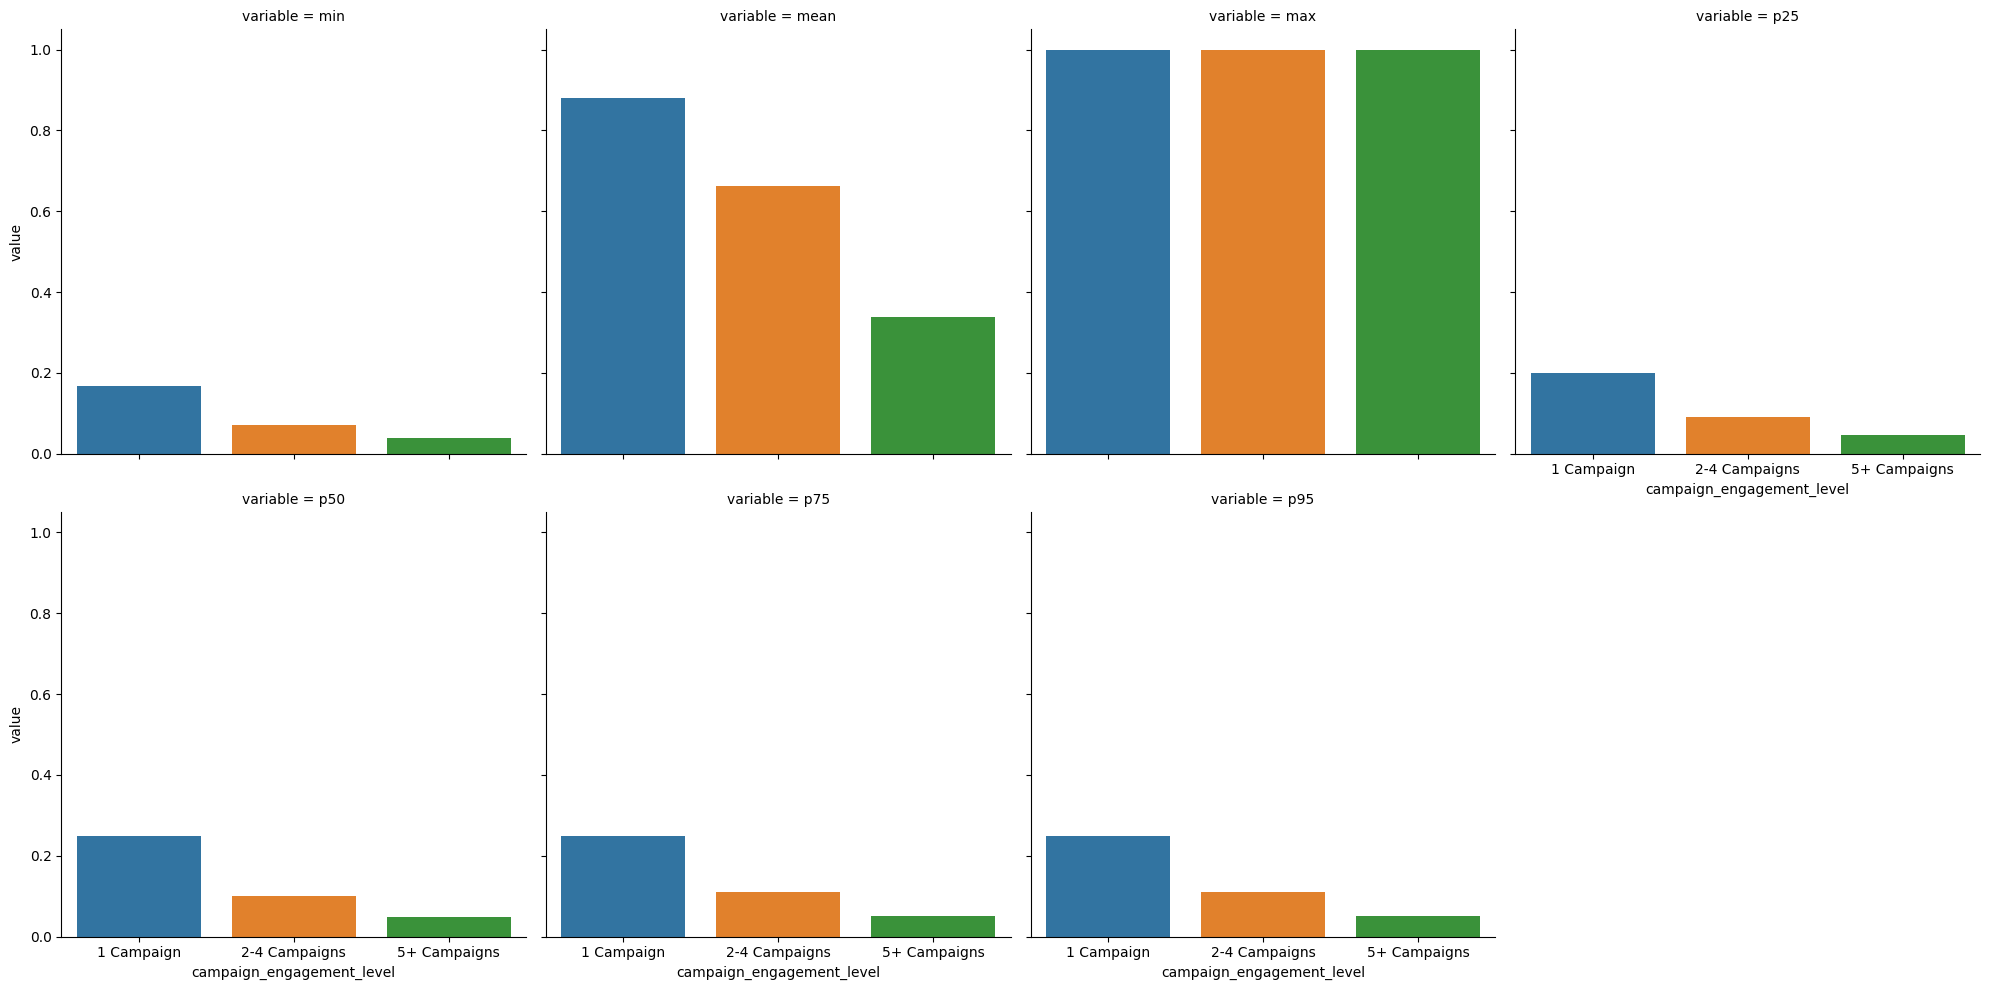

In [52]:
# Draw plot to help us understand the data above. What would be your plot of choice?
sns.catplot(data = campaign_engagement_melt,
            x= "campaign_engagement_level",
            y= "value",
            kind= "bar",
            col= "variable",
            col_wrap=4
            )

# Show the plot
plt.show()

In [53]:
# Describe numerical columns
campaign_merge.describe()

,count_respond,contact_per_campaign,response_rate,contact_frequency,sum_duration_of_contact,avg_duration_of_contact,campaign_engagement_cnt
count,3693.000000,3693.000000,3693.000000,3693.000000,3693.000000,3693.000000,3693.000000
mean,1.256431,3.796913,0.617485,12.070674,3388.010019,349.944110,3.617113
std,0.760296,4.769829,0.352509,15.324696,3989.388900,221.040406,2.377360
min,1.000000,1.000000,0.038462,1.000000,63.000000,44.000000,1.000000
25%,1.000000,1.000000,0.285714,2.000000,774.000000,231.857143,2.000000
50%,1.000000,2.000000,0.500000,6.000000,1840.000000,287.000000,3.000000
75%,1.000000,4.000000,1.000000,17.000000,4617.000000,390.733333,5.000000
max,10.000000,54.000000,1.000000,114.000000,26895.000000,2926.000000,13.000000


# Step 3: Calculate score based on threshold

- To make it simple, below is the definition and the thresholds that I will need to segment every customer based on different variables.

- Each will be converted to a score between `1 and 3` and later, I will combine all the composite variables into a single score based on pre-defined weight.

</br>
</br>

### Contact Frequency

| |Engagement Level|Threshold/Range|
|-|-|-|
|1|Low Engagement	|<= 2|
|2|Moderately Engaged	|> 2 and <= 4|
|3|Highly Engaged|	> 4|


</br>
</br>


### Duration of Contact

| |Engagement Level|Threshold/Range|
|-|-|-|
|1|Low Engagement	|<= 500|
|2|Moderately Engaged|	> 500 and <= 1000|
|3|Highly Engaged|	> 1000|



</br>
</br>


### Average Duration of Contact

| |Engagement Level|Threshold/Range|
|-|-|-|
|1|Low Engagement	|<= 200|
|2|Moderately Engaged|	> 200 and <= 400|
|3|Highly Engaged|	> 400|



</br>
</br>


### Campaign Engagement

| |Engagement Level|Threshold/Range|
|-|-|-|
|1|Low Engagement	|1 campaign|
|2|Moderately Engaged|2-4 campaign|
|3|Highly Engaged|5+ campaign|


</br>
</br>


### Campaign Conversion Rate

| | |Engagement Level|Threshold/Range|
|-|-|-|-|
|1|1 campaign|	Low Engagement|	<= 0.5|
|2| |Moderately Engaged|	> 0.5 and <= 0.75|
|3| |Highly Engaged|	> 0.75|
|1|2-4 campaign|	Low Engagement|	<= 0.5|
|2| |Moderately Engaged|	> 0.5 and <= 0.75|
|3| |Highly Engaged|	> 0.75|
|1|5+ campaign|	Low Engagement|	<= 0.25|
|2| |Moderately Engaged|	> 0.25 and <= 0.5|
|3| |Highly Engaged|	> 0.5|






In [54]:
# copy campaign_merge into a new DataFrame called campaign_score
campaign_score = campaign_merge.copy()

# reset index
campaign_score.reset_index(inplace=True)

# show first 5 rows
campaign_score.head()

,customer_id,campaign,y,count_respond,contact_per_campaign,response_rate,contact_frequency,sum_duration_of_contact,avg_duration_of_contact,campaign_engagement_cnt,campaign_engagement_level
0,17101222,2,yes,1,1,1.0,1,498,498.000000,1,1 Campaign
1,17101601,1,yes,1,1,1.0,1,896,896.000000,1,1 Campaign
2,18101100,1,yes,1,2,0.5,3,602,200.666667,2,2-4 Campaigns
3,18101100,2,yes,1,1,1.0,3,602,200.666667,2,2-4 Campaigns
4,18101200,2,yes,1,1,1.0,1,412,412.000000,1,1 Campaign


In [55]:
# Get 50th percentile response_rate, group by customer_id. Save it into campaign_rate_per_customer
campaign_rate_per_customer = pd.DataFrame(campaign_score.groupby('customer_id')['response_rate'].agg(p50))

# Rename to result column to be campaign_rate_per_customer
campaign_rate_per_customer.rename(columns={'response_rate':'campaign_rate_per_customer'}, inplace=True)

# Merge campaign_score with campaign_rate_per_customer by customer_id
campaign_score = campaign_score.merge(campaign_rate_per_customer, how="left", on="customer_id")

# Show first 5 rows
campaign_score.head()

,customer_id,campaign,y,count_respond,contact_per_campaign,response_rate,contact_frequency,sum_duration_of_contact,avg_duration_of_contact,campaign_engagement_cnt,campaign_engagement_level,campaign_rate_per_customer
0,17101222,2,yes,1,1,1.0,1,498,498.000000,1,1 Campaign,1.0000
1,17101601,1,yes,1,1,1.0,1,896,896.000000,1,1 Campaign,1.0000
2,18101100,1,yes,1,2,0.5,3,602,200.666667,2,2-4 Campaigns,0.5025
3,18101100,2,yes,1,1,1.0,3,602,200.666667,2,2-4 Campaigns,0.5025
4,18101200,2,yes,1,1,1.0,1,412,412.000000,1,1 Campaign,1.0000


In [56]:
# Contact frequency: contact_frequency_score

campaign_score.loc[campaign_score['contact_frequency'] <= 2,'contact_frequency_score'] = 1
campaign_score.loc[(campaign_score['contact_frequency'] > 2) & (campaign_score['contact_frequency'] <= 4),'contact_frequency_score'] = 2
campaign_score.loc[campaign_score['contact_frequency'] > 4,'contact_frequency_score'] = 3



# Duration of Contact: duration_of_contact_score

campaign_score.loc[campaign_score['sum_duration_of_contact'] <= 500,'duration_of_contact_score'] = 1
campaign_score.loc[(campaign_score['sum_duration_of_contact'] > 500) & (campaign_score['sum_duration_of_contact'] <= 1000),'duration_of_contact_score'] = 2
campaign_score.loc[campaign_score['sum_duration_of_contact'] > 1000,'duration_of_contact_score'] = 3


# Avg Duration of Contact: avg_duration_of_contact_score

campaign_score.loc[campaign_score['avg_duration_of_contact'] <= 200,'avg_duration_of_contact_score'] = 1
campaign_score.loc[(campaign_score['avg_duration_of_contact'] > 200) & (campaign_score['avg_duration_of_contact'] <= 400),'avg_duration_of_contact_score'] = 2
campaign_score.loc[campaign_score['avg_duration_of_contact'] > 400,'avg_duration_of_contact_score'] = 3


# Campaign Rate: campaign_rate_score

campaign_score.loc[(campaign_score['campaign_engagement_cnt'] < 5) & (campaign_score['campaign_rate_per_customer'] <= 0.5), 'campaign_rate_score'] = 1
campaign_score.loc[(campaign_score['campaign_engagement_cnt'] < 5) & (campaign_score['campaign_rate_per_customer'] > 0.5) & (campaign_score['campaign_rate_per_customer'] <= 0.75), 'campaign_rate_score'] = 2
campaign_score.loc[(campaign_score['campaign_engagement_cnt'] < 5) & (campaign_score['campaign_rate_per_customer'] > 0.75) , 'campaign_rate_score'] = 3

campaign_score.loc[(campaign_score['campaign_engagement_cnt'] >= 5) & (campaign_score['campaign_rate_per_customer'] <= 0.25), 'campaign_rate_score'] = 1
campaign_score.loc[(campaign_score['campaign_engagement_cnt'] >= 5) & (campaign_score['campaign_rate_per_customer'] > 0.25) & (campaign_score['campaign_rate_per_customer'] <= 0.5), 'campaign_rate_score'] = 2
campaign_score.loc[(campaign_score['campaign_engagement_cnt'] >= 5) & (campaign_score['campaign_rate_per_customer'] > 0.5) , 'campaign_rate_score'] = 3



# Campaign Engagement: campaign_engagement_score
campaign_score.loc[campaign_score['campaign_engagement_cnt'] == 1,'campaign_engagement_score'] = 1
campaign_score.loc[(campaign_score['campaign_engagement_cnt'] > 1) & (campaign_score['campaign_engagement_cnt'] <= 4),'campaign_engagement_score'] = 2
campaign_score.loc[campaign_score['campaign_engagement_cnt'] > 4,'avg_duration_of_contact_score'] = 3


In [57]:
campaign_score.head()

,customer_id,campaign,y,count_respond,contact_per_campaign,response_rate,contact_frequency,sum_duration_of_contact,avg_duration_of_contact,campaign_engagement_cnt,campaign_engagement_level,campaign_rate_per_customer,contact_frequency_score,duration_of_contact_score,avg_duration_of_contact_score,campaign_rate_score,campaign_engagement_score
0,17101222,2,yes,1,1,1.0,1,498,498.000000,1,1 Campaign,1.0000,1.0,1.0,3.0,3.0,1.0
1,17101601,1,yes,1,1,1.0,1,896,896.000000,1,1 Campaign,1.0000,1.0,2.0,3.0,3.0,1.0
2,18101100,1,yes,1,2,0.5,3,602,200.666667,2,2-4 Campaigns,0.5025,2.0,2.0,2.0,2.0,2.0
3,18101100,2,yes,1,1,1.0,3,602,200.666667,2,2-4 Campaigns,0.5025,2.0,2.0,2.0,2.0,2.0
4,18101200,2,yes,1,1,1.0,1,412,412.000000,1,1 Campaign,1.0000,1.0,1.0,3.0,3.0,1.0


- Now, I will combine the 5 parts composite into a single final score based on the weight decided by stakeholders.

</br>

|Metric|Weight by stakeholder|
|-|-|
| Contact Frequency	| 8 |
| Duration of Contact	| 7 |
| Average Duration of Contact	| 6 |
| Campaign Engagement	| 5 |
| Campaign Conversion Rate |	9 |

</br>

In [58]:
# Calculate the final score
campaign_score["overall_engagement_score"] = (campaign_score['contact_frequency_score'] * 8) +\
                                                (campaign_score['duration_of_contact_score'] * 7) +\
                                                (campaign_score['avg_duration_of_contact_score'] * 6) +\
                                                (campaign_score['campaign_engagement_score'] * 5) +\
                                                (campaign_score['campaign_rate_score'] * 9)

</br>

|Threshold|`engagement_category`|
|-|-|
|overall_engagement_score <=48|Low engagement|
|48 < overall_engagement_score <= 68|Moderate engagement|
|overall_engagement_score > 68|Highly engaged|

In [59]:
# Categorize based on threshold, save it into a new column called `engagement_category`
campaign_score.loc[campaign_score['overall_engagement_score'] <= 48, 'engagement_category'] = 'Low engagement'
campaign_score.loc[(campaign_score['overall_engagement_score'] > 48) & (campaign_score['overall_engagement_score'] <=68), 'engagement_category'] = 'Moderately engaged'
campaign_score.loc[campaign_score['overall_engagement_score'] > 68, 'engagement_category'] = 'Highly engaged'

In [60]:
campaign_score['engagement_category'].value_counts()

engagement_category
Highly engaged        1656
Moderately engaged     737
Low engagement         101
Name: count, dtype: int64

# Step 5: Check Percentage

- I have to labeled every customer into different engagement category.

- The last step is to know how many of the users from each `campaign` labelled into each `engagement_category`.

In [61]:
# Find unique customer_id per campagin
campaign_level_agg = df.groupby('campaign').agg({'customer_id':'nunique'})

# Rename the result column into `total_unique_customer`
campaign_level_agg.rename(columns={'customer_id':'total_unique_customer'}, inplace=True)

# Show first 5 rows
campaign_level_agg.head()

,total_unique_customer
campaign,
1,6565
2,4973
3,3153
4,1928
5,1252


In [62]:
# Find unique customer_id per campaign and y
campaign_level_respond_agg = df.groupby(['campaign', 'y']).agg({'customer_id':'nunique'})

# Rename the result column into `responded_customers`
campaign_level_respond_agg.rename(columns={'customer_id':'responded_customers'}, inplace=True)

# Get only data with y='yes'
campaign_level_respond_agg = campaign_level_respond_agg.loc[(slice(None), 'yes'), :]

# Show first 5 rows
campaign_level_respond_agg.head()

,,responded_customers
campaign,y,
1,yes,1645
2,yes,994
3,yes,511
4,yes,241
5,yes,117


In [63]:
# Merge campaign_level_respond_agg with campaign_level_agg
campaign_level_merge = campaign_level_respond_agg.merge(campaign_level_agg, left_index=True, right_index=True)

# Calculate campaign_cvr_rate
campaign_level_merge['campaign_cvr_rate'] = campaign_level_merge['responded_customers'] / campaign_level_merge['total_unique_customer']

# Drop index / column `y`, we don't need it anymore
campaign_level_merge = campaign_level_merge.droplevel(1)

# Show first 5 rows
campaign_level_merge.head()

,responded_customers,total_unique_customer,campaign_cvr_rate
campaign,,,
1,1645,6565,0.250571
2,994,4973,0.199879
3,511,3153,0.162068
4,241,1928,0.125000
5,117,1252,0.093450


In [64]:
# Get unique customer_id per campaign and engagement_category
campaign_engagement_agg = campaign_score.groupby(['campaign', 'engagement_category']).agg({'customer_id':'nunique'})

# Rename the result column into `customer_cnt`
campaign_engagement_agg.rename(columns={'customer_id':'customer_cnt'}, inplace=True)

# Show first 10 rows
campaign_engagement_agg.head(10)

customer_cnt
campaign engagement_category              
1        Highly engaged                735
         Low engagement                 79
         Moderately engaged            405
2        Highly engaged                465
         Low engagement                 20
         Moderately engaged            190
3        Highly engaged                225
         Low engagement                  2
         Moderately engaged             82
4        Highly engaged                117

In [65]:
# Merge campaign_engagement_agg with campaign_level_merge
campaign_final_merge = campaign_engagement_agg.merge(campaign_level_merge, left_index=True, right_index=True)

# Calculate percentage
campaign_final_merge["percentage"] = campaign_final_merge['customer_cnt'] / campaign_final_merge['total_unique_customer']

# Show first 5 rows
campaign_final_merge.head()

customer_cnt  responded_customers  \
campaign engagement_category                                      
1        Highly engaged                735                 1645   
         Low engagement                 79                 1645   
         Moderately engaged            405                 1645   
2        Highly engaged                465                  994   
         Low engagement                 20                  994   

                              total_unique_customer  campaign_cvr_rate  \
campaign engagement_category                                             
1        Highly engaged                        6565           0.250571   
         Low engagement                        6565           0.250571   
         Moderately engaged                    6565           0.250571   
2        Highly engaged                        4973           0.199879   
         Low engagement                        4973           0.199879   

                              percentage  
campaign engagement_category              
1        Highly engaged         0.111957  
         Low engagement         0.012034  
         Moderately engaged     0.061691  
2        Highly engaged         0.093505  
         Low engagement         0.004022

Campaign 1:

- Highly engaged: 0.250571
- Low engagement: 0.250571
- Moderately engaged: 0.250571

Campaign 2:

- Highly engaged: 0.199879
- Low engagement: 0.199879

In this case, for the "Highly engaged" category, Campaign 1 has a higher conversion rate (0.250571) compared to Campaign 2 (0.199879). Therefore, Campaign 1 gives the highest probability of engagement in the "Highly engaged" category.

So, Campaign 1 is the one that provides the highest probability of engagement in the "Highly engaged" category based on the given data.

In [66]:
campaign_final_merge.reset_index(inplace=True)

In [67]:
campaign_final_merge_pivot = campaign_final_merge.pivot(index="campaign", columns="engagement_category", values="percentage")
campaign_final_merge_pivot

engagement_category,Highly engaged,Low engagement,Moderately engaged
campaign,,,
1,0.111957,0.012034,0.061691
2,0.093505,0.004022,0.038206
3,0.071361,0.000634,0.026007
4,0.060685,NaN,0.015560
5,0.031949,NaN,0.010383
6,0.032028,NaN,0.014235
7,0.030035,NaN,0.005300
8,0.019074,NaN,0.002725
9,0.025926,NaN,NaN


<Axes: xlabel='engagement_category', ylabel='campaign'>

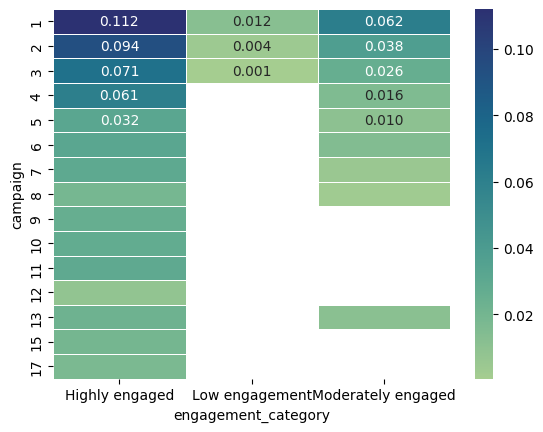

In [68]:
sns.heatmap(campaign_final_merge_pivot,
            annot=True,
            fmt=".3f",
            linewidth=.5,
            cmap="crest"
            )